In [130]:
from google_play_scraper import app, Sort, reviews_all
from app_store_scraper import AppStore
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json, os, uuid

In [131]:
g_reviews = reviews_all(
        "in.zupay.app",
        sleep_milliseconds=0,
        lang='en',
        country='in',
        sort=Sort.NEWEST,
    )
a_reviews = AppStore('in', 'zuai-1-self-study-app', '1609941536')
a_reviews.review()

2024-04-30 15:39:52,818 [INFO] Base - Initialised: AppStore('in', 'zuai-1-self-study-app', 1609941536)


2024-04-30 15:39:52,819 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/in/app/zuai-1-self-study-app/id1609941536


2024-04-30 15:39:52,954 [INFO] Base - [id:1609941536] Fetched 6 reviews (6 fetched in total)


In [132]:
g_df = pd.DataFrame(np.array(g_reviews),columns=['review'])
g_df2 = g_df.join(pd.DataFrame(g_df.pop('review').tolist()))

g_df2.drop(columns={'userImage', 'reviewCreatedVersion'},inplace = True)
g_df2.rename(columns= {'score': 'rating','userName': 'user_name', 'reviewId': 'review_id', 'content': 'review_description', 'at': 'review_date', 'replyContent': 'developer_response', 'repliedAt': 'developer_response_date', 'thumbsUpCount': 'thumbs_up'},inplace = True)
g_df2.insert(loc=0, column='source', value='Google Play')
g_df2.insert(loc=3, column='review_title', value=None)
g_df2['laguage_code'] = 'en'
g_df2['country_code'] = 'in'
g_df2

,source,review_id,user_name,review_title,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,appVersion,laguage_code,country_code
0,Google Play,c774de5e-b81a-44f9-a1b8-1b914ac4aa36,Maulik Singh,None,THIS APP IS VERY HELPFUL FOR US I LIKE THIS AP...,5,0,2024-04-29 15:03:34,None,NaT,5.1.3,en,in
1,Google Play,23aebf22-0bc2-4efe-a05e-8457bc67f5ea,Nandan Yadav,None,Good aap and pls go to download this app,5,0,2024-04-29 14:13:55,None,NaT,5.1.1,en,in
2,Google Play,b8d25631-6c49-4db8-bc1f-cbf330ac86cc,Tanya Sharma,None,lovely,5,0,2024-04-29 09:08:31,None,NaT,5.1.3,en,in
3,Google Play,2ab891ce-9260-4ff6-99e2-c336ba84c075,Sidheswar Murmu,None,best app ever,5,0,2024-04-29 07:52:36,None,NaT,5.1.3,en,in
4,Google Play,2a477e46-8079-4364-8b38-fdbbd1395f5b,Rohan Yadav,None,best for my study,5,0,2024-04-29 00:42:03,None,NaT,5.1.1,en,in
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,Google Play,b3a7ce2a-30cb-4c94-a691-75f9123f3fce,Ojas Nigade,None,Totally Amazing App. Loved it. Just a small re...,5,0,2024-03-03 12:12:47,None,NaT,4.7.4,en,in
394,Google Play,b90d45a0-83a2-4c24-b96d-fcf899bee867,Heena Kauser,None,This app is so helpfull I got 99 Marks . this ...,5,0,2024-03-03 11:26:47,None,NaT,4.7.4,en,in
395,Google Play,34a6afe1-66c7-479b-8656-f8787556f2b9,Anjum Ali,None,well done,1,0,2024-03-03 11:26:35,"Hi Anjum,\n\nWe're thrilled to hear that you'r...",2024-03-04 14:35:17,4.7.4,en,in
396,Google Play,a19cd543-fe0f-4eb6-bd1d-a0ac78d11176,Rekha Kajaniya,None,This app is very very nice and this app shows ...,5,0,2024-03-03 11:26:10,None,NaT,4.6.5,en,in


In [133]:
a_df = pd.DataFrame(np.array(a_reviews.reviews),columns=['review'])
a_df2 = a_df.join(pd.DataFrame(a_df.pop('review').tolist()))

a_df2.drop(columns={'isEdited'},inplace = True)
a_df2.insert(loc=0, column='source', value='App Store')
a_df2['developer_response_date'] = None
a_df2['thumbs_up'] = None
a_df2['laguage_code'] = 'en'
a_df2['country_code'] = 'in'
a_df2.insert(loc=1, column='review_id', value=[uuid.uuid4() for _ in range(len(a_df2.index))])
a_df2.rename(columns= {'review': 'review_description','userName': 'user_name', 'date': 'review_date','title': 'review_title', 'developerResponse': 'developer_response'},inplace = True)
a_df2 = a_df2.where(pd.notnull(a_df2), None)
a_df2

,source,review_id,review_date,review_description,rating,review_title,user_name,developer_response_date,thumbs_up,laguage_code,country_code
0,App Store,d06f9e90-3629-4c63-aff0-01f533e33696,2023-10-18 16:32:18,This is absolutely an amazing application for ...,5,Awesome app,Etudiantè,None,None,en,in
1,App Store,40b74c19-0614-48dc-b0a7-f63938065a60,2024-02-04 13:16:56,I extremely love it! It has some glitches some...,5,Zu Ai,~Manpreet,None,None,en,in
2,App Store,2f4769ba-1bc8-44ac-af03-5a54b83b6287,2022-05-01 11:39:54,Awsm app for teenagers and I am in love with t...,5,Bestest teenage investing app,yatharth647,None,None,en,in
3,App Store,4adc32b3-d61f-4241-a686-3784799dd678,2024-01-18 07:34:24,This app is amazing. It helps me with everythi...,5,Danika ‘s review,Danika 77,None,None,en,in
4,App Store,fd3357b9-6bcc-40ce-8df1-8cd24ff73d78,2023-04-03 10:21:16,It’s a great app for teens to learn investing....,5,Great app for teens,Divya7071,None,None,en,in
5,App Store,ee72a9ff-adcb-48ed-8ecf-308987bcdf30,2024-02-11 03:23:55,it dont have my chapter yeeee i want to see it,1,very very very poor app,mojo tg,None,None,en,in


In [134]:
result = pd.concat([g_df2,a_df2])
result

,source,review_id,user_name,review_title,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,appVersion,laguage_code,country_code
0,Google Play,c774de5e-b81a-44f9-a1b8-1b914ac4aa36,Maulik Singh,None,THIS APP IS VERY HELPFUL FOR US I LIKE THIS AP...,5,0,2024-04-29 15:03:34,None,NaT,5.1.3,en,in
1,Google Play,23aebf22-0bc2-4efe-a05e-8457bc67f5ea,Nandan Yadav,None,Good aap and pls go to download this app,5,0,2024-04-29 14:13:55,None,NaT,5.1.1,en,in
2,Google Play,b8d25631-6c49-4db8-bc1f-cbf330ac86cc,Tanya Sharma,None,lovely,5,0,2024-04-29 09:08:31,None,NaT,5.1.3,en,in
3,Google Play,2ab891ce-9260-4ff6-99e2-c336ba84c075,Sidheswar Murmu,None,best app ever,5,0,2024-04-29 07:52:36,None,NaT,5.1.3,en,in
4,Google Play,2a477e46-8079-4364-8b38-fdbbd1395f5b,Rohan Yadav,None,best for my study,5,0,2024-04-29 00:42:03,None,NaT,5.1.1,en,in
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,App Store,40b74c19-0614-48dc-b0a7-f63938065a60,~Manpreet,Zu Ai,I extremely love it! It has some glitches some...,5,None,2024-02-04 13:16:56,NaN,NaT,NaN,en,in
2,App Store,2f4769ba-1bc8-44ac-af03-5a54b83b6287,yatharth647,Bestest teenage investing app,Awsm app for teenagers and I am in love with t...,5,None,2022-05-01 11:39:54,NaN,NaT,NaN,en,in
3,App Store,4adc32b3-d61f-4241-a686-3784799dd678,Danika 77,Danika ‘s review,This app is amazing. It helps me with everythi...,5,None,2024-01-18 07:34:24,NaN,NaT,NaN,en,in
4,App Store,fd3357b9-6bcc-40ce-8df1-8cd24ff73d78,Divya7071,Great app for teens,It’s a great app for teens to learn investing....,5,None,2023-04-03 10:21:16,NaN,NaT,NaN,en,in


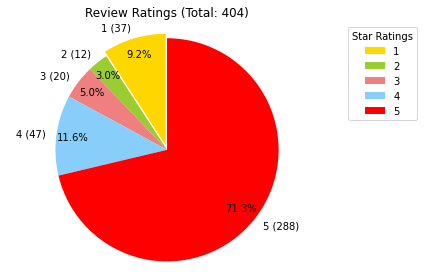

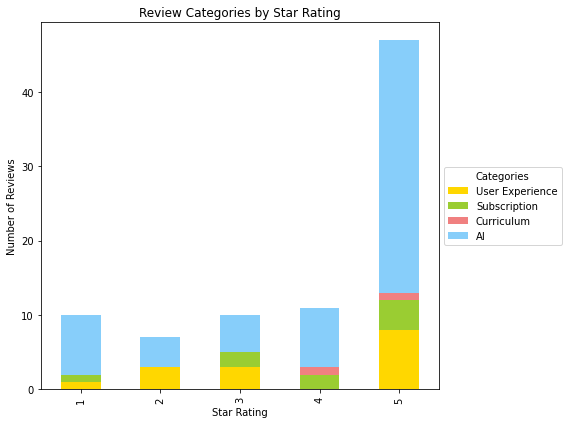

In [135]:
# 1. Donut Pie Chart
total_ratings = len(result)
rating_counts = result['rating'].value_counts().sort_index()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red']
explode = (0.05, 0, 0, 0, 0)  # explode the 1-star slice

# Create the donut plot
fig, ax = plt.subplots()
ax.pie(rating_counts, radius=1.2, colors=colors, labels=[f"{star_rating} ({count})" for star_rating, count in rating_counts.items()], autopct='%1.1f%%',
       startangle=90, pctdistance=0.85, explode=explode)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title(f'Review Ratings (Total: {total_ratings})')
plt.legend(rating_counts.index, title='Star Ratings', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# 2. Stacked Bar Chart
user_experience_keywords = ['crash', 'crashed', 'UI', 'UX']
subscription_keywords = ['premium', 'costly']
curriculum_keywords = ['lacking', 'my subject', 'maths']
ai_keywords = ['AI', 'bot', 'slow']

user_experience_reviews = result['review_description'].str.contains('|'.join(user_experience_keywords), case=False)
subscription_reviews = result['review_description'].str.contains('|'.join(subscription_keywords), case=False)
curriculum_reviews = result['review_description'].str.contains('|'.join(curriculum_keywords), case=False)
ai_reviews = result['review_description'].str.contains('|'.join(ai_keywords), case=False)

categories = pd.DataFrame({
    'User Experience': user_experience_reviews.groupby(result['rating']).sum(),
    'Subscription': subscription_reviews.groupby(result['rating']).sum(),
    'Curriculum': curriculum_reviews.groupby(result['rating']).sum(),
    'AI': ai_reviews.groupby(result['rating']).sum()
})

fig, ax = plt.subplots(figsize=(8, 6))
ax = categories.plot(kind='bar', stacked=True, ax=ax, color=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue'])
ax.set_xlabel('Star Rating')
ax.set_ylabel('Number of Reviews')
ax.set_title('Review Categories by Star Rating')
ax.legend(title='Categories', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()